# AI Project(SVM)
Explores the use of Support Vector Machines (SVM) on various datasets with different levels of complexity. It includes an analysis of the impact of data complexity on SVM core selection and parameter tuning. Additionally, the project applies SVM with Principal Component Analysis (PCA) for dimensionality reduction on the fashion-mnist dataset.

In [74]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import metrics, svm
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Part 1

In [82]:
# Function to plot data points
def plot_data(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [83]:

# Function to plot decision boundary and margins
def plot_svm_boundary(clf, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [84]:
# Function to train SVM and plot results
def train_and_plot(X, y, kernel, C, gamma=None):
    print(f"Training SVM with {kernel} kernel, C={C}, gamma={gamma}")
    if kernel == 'linear':
        clf = SVC(kernel=kernel, C=C)
    else:
        clf = SVC(kernel=kernel, C=C, gamma=gamma)
    clf.fit(X, y)
    print(f"Number of support vectors: {len(clf.support_vectors_)}")
    plot_svm_boundary(clf, X, y, f'SVM with {kernel} kernel (C={C}, gamma={gamma})')

Generating datasets...


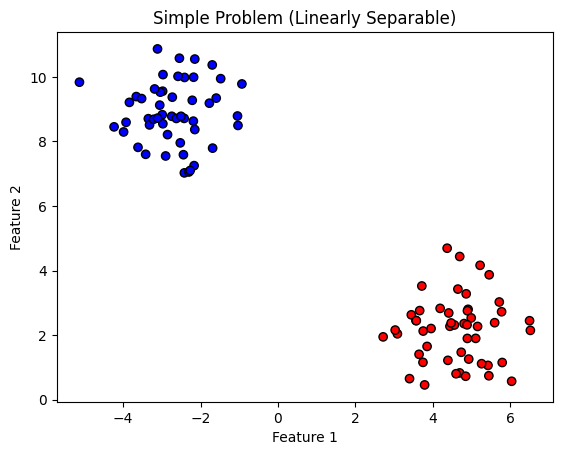

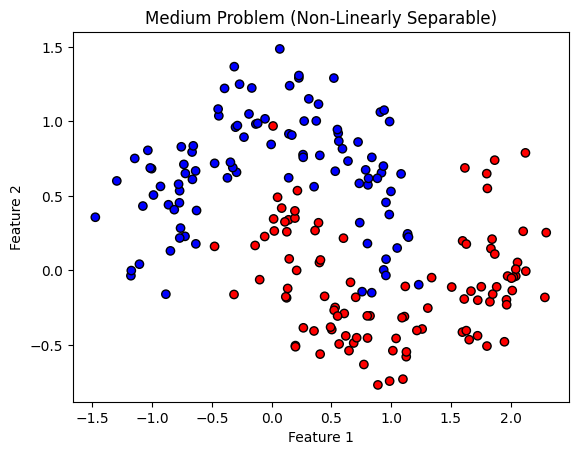

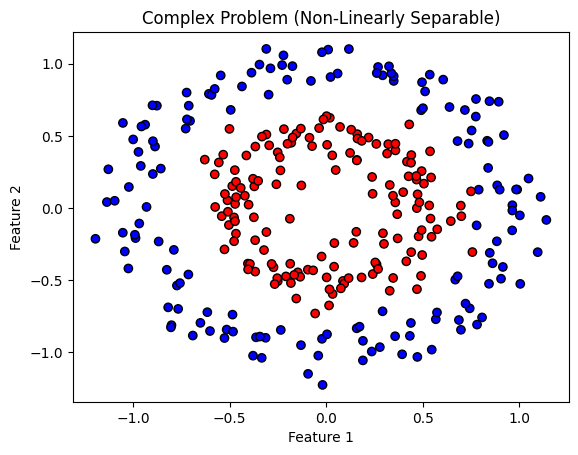

In [85]:
# Generate datasets
print("Generating datasets...")
X_simple, y_simple = make_blobs(n_samples=100, centers=2, random_state=42)
plot_data(X_simple, y_simple, 'Simple Problem (Linearly Separable)')

X_medium, y_medium = make_moons(n_samples=200, noise=0.2, random_state=42)
plot_data(X_medium, y_medium, 'Medium Problem (Non-Linearly Separable)')

X_complex, y_complex = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
plot_data(X_complex, y_complex, 'Complex Problem (Non-Linearly Separable)')

In [86]:
# Standardize data
print("Standardizing data...")
scaler = StandardScaler()
X_simple = scaler.fit_transform(X_simple)
X_medium = scaler.fit_transform(X_medium)
X_complex = scaler.fit_transform(X_complex)

Standardizing data...


SVM with linear kernel on simple problem
Training SVM with linear kernel, C=1, gamma=None
Number of support vectors: 2


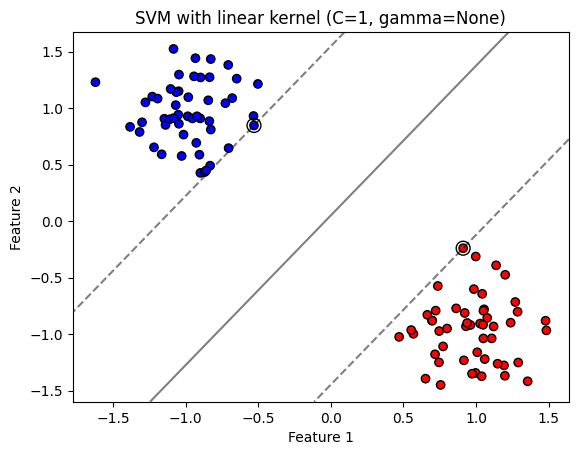

SVM with RBF kernel on medium problem
Training SVM with rbf kernel, C=1, gamma=0.5
Number of support vectors: 65


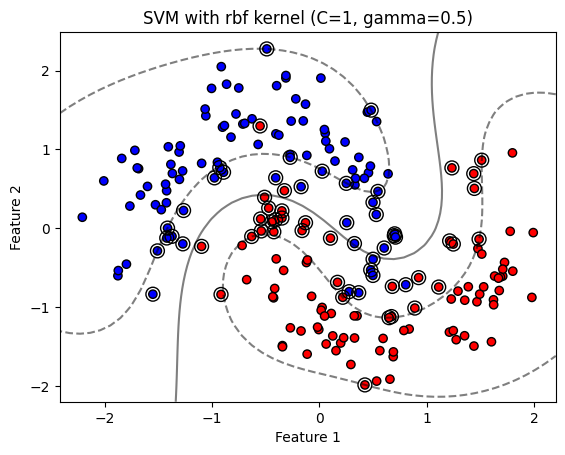

SVM with polynomial kernel on complex problem
Training SVM with poly kernel, C=1, gamma=1
Number of support vectors: 296


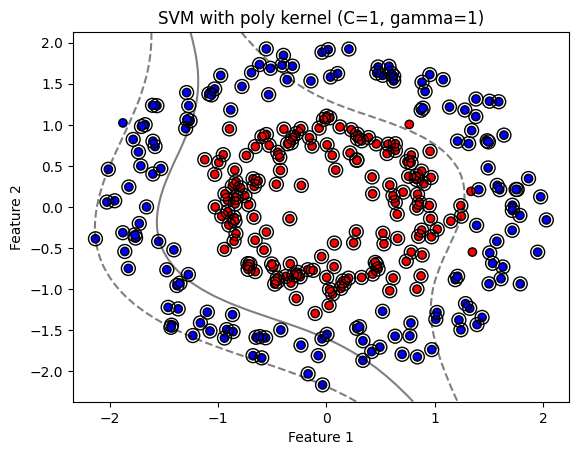

In [87]:
# SVM with linear kernel on simple problem
print("SVM with linear kernel on simple problem")
train_and_plot(X_simple, y_simple, kernel='linear', C=1)

# SVM with RBF kernel on medium problem
print("SVM with RBF kernel on medium problem")
train_and_plot(X_medium, y_medium, kernel='rbf', C=1, gamma=0.5)

# SVM with polynomial kernel on complex problem
print("SVM with polynomial kernel on complex problem")
train_and_plot(X_complex, y_complex, kernel='poly', C=1, gamma=1)

## Tests and Explanations

SVM with linear kernel on simple problem, C=1
Training SVM with linear kernel, C=1, gamma=None
Number of support vectors: 2


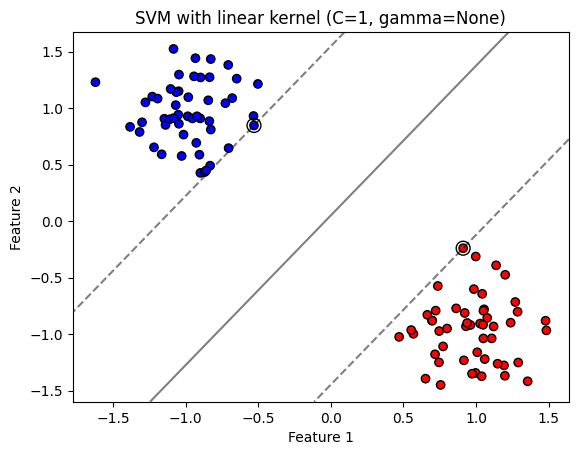

Simple problem with linear kernel, C=0.1
Training SVM with linear kernel, C=0.1, gamma=None
Number of support vectors: 12


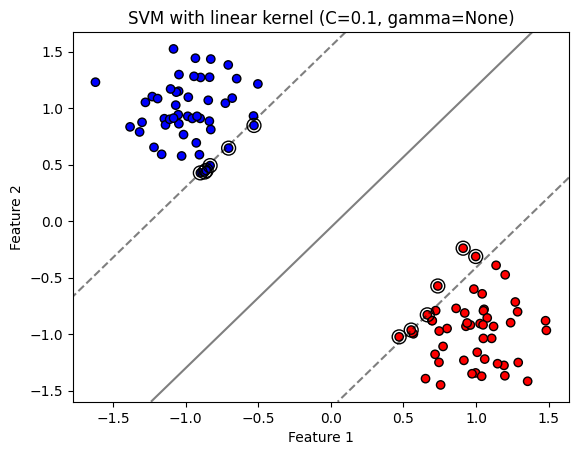

SVM with RBF kernel on medium problem, C=1, gamma=0.5
Training SVM with rbf kernel, C=1, gamma=0.5
Number of support vectors: 65


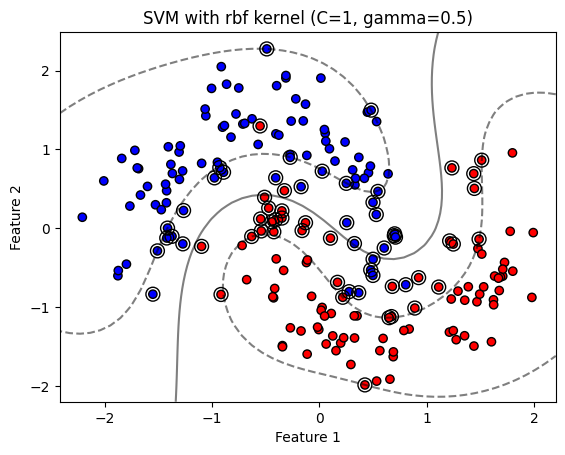

Medium problem with RBF kernel, C=1, gamma=0.1
Training SVM with rbf kernel, C=1, gamma=0.1
Number of support vectors: 79


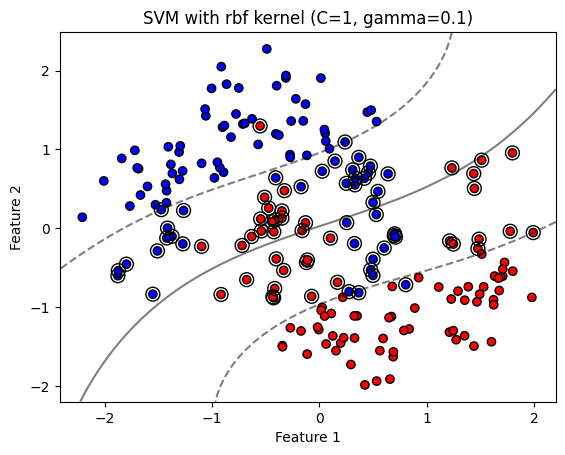

Medium problem with RBF kernel, C=10, gamma=0.5
Training SVM with rbf kernel, C=10, gamma=0.5
Number of support vectors: 33


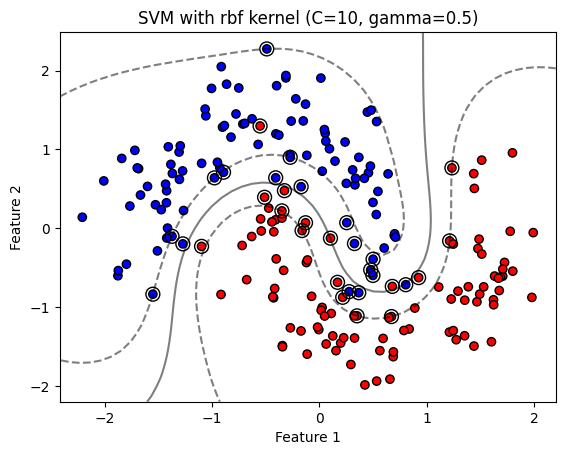

Medium problem with RBF kernel, C=0.1, gamma=0.5
Training SVM with rbf kernel, C=0.1, gamma=0.5
Number of support vectors: 114


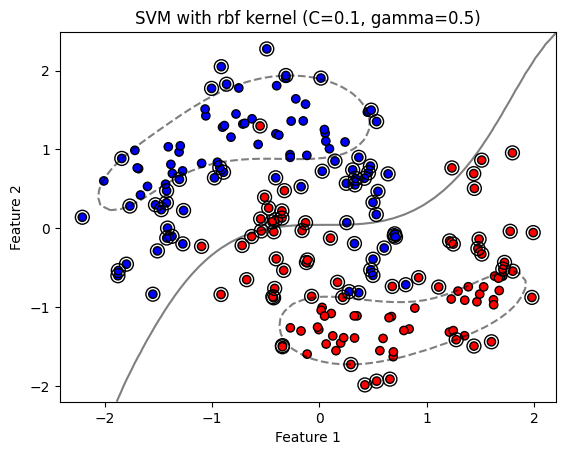

SVM with polynomial kernel on complex problem, C=1, gamma=1
Training SVM with poly kernel, C=1, gamma=1
Number of support vectors: 296


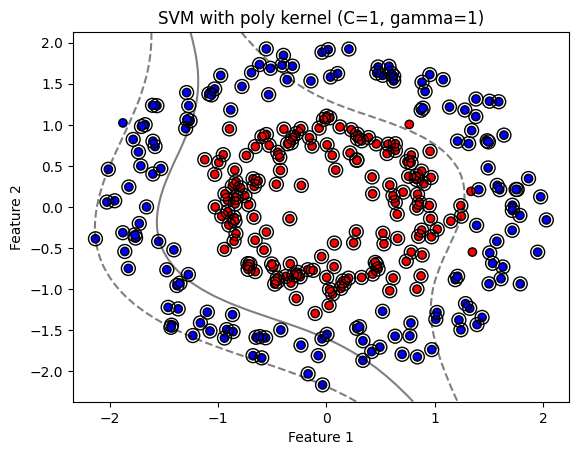

Complex problem with polynomial kernel, C=1, gamma=0.1
Training SVM with poly kernel, C=1, gamma=0.1
Number of support vectors: 300


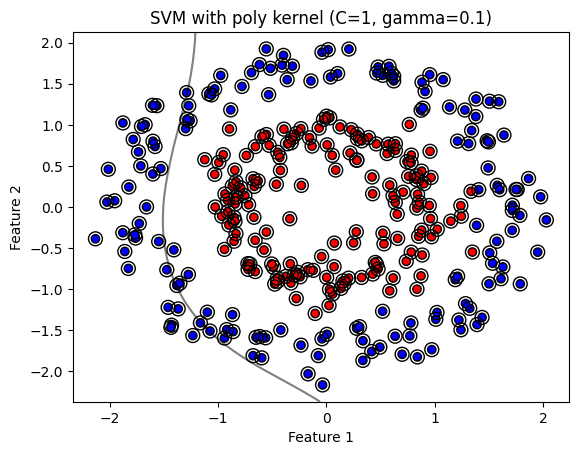

Complex problem with polynomial kernel, C=10, gamma=1
Training SVM with poly kernel, C=10, gamma=1
Number of support vectors: 296


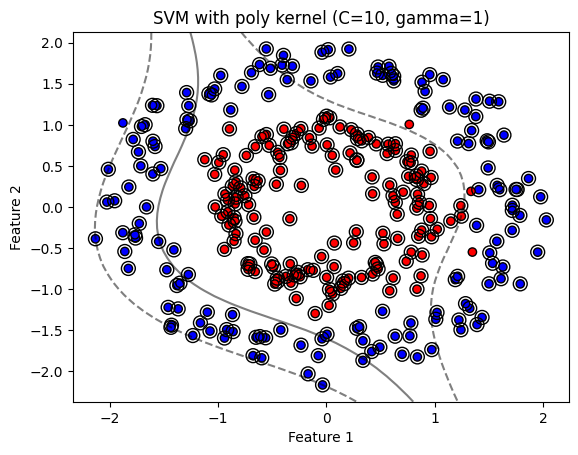

In [89]:
# SVM with linear kernel on simple problem
print("SVM with linear kernel on simple problem, C=1")
train_and_plot(X_simple, y_simple, kernel='linear', C=1)

# SVM with linear kernel on simple problem, C=0.1
print("Simple problem with linear kernel, C=0.1")
train_and_plot(X_simple, y_simple, kernel='linear', C=0.1)

# SVM with RBF kernel on medium problem, C=1, gamma=0.5
print("SVM with RBF kernel on medium problem, C=1, gamma=0.5")
train_and_plot(X_medium, y_medium, kernel='rbf', C=1, gamma=0.5)

# SVM with RBF kernel on medium problem, C=1, gamma=0.1
print("Medium problem with RBF kernel, C=1, gamma=0.1")
train_and_plot(X_medium, y_medium, kernel='rbf', C=1, gamma=0.1)

# SVM with RBF kernel on medium problem, C=10, gamma=0.5
print("Medium problem with RBF kernel, C=10, gamma=0.5")
train_and_plot(X_medium, y_medium, kernel='rbf', C=10, gamma=0.5)

# SVM with RBF kernel on medium problem, C=0.1, gamma=0.5
print("Medium problem with RBF kernel, C=0.1, gamma=0.5")
train_and_plot(X_medium, y_medium, kernel='rbf', C=0.1, gamma=0.5)

# SVM with polynomial kernel on complex problem, C=1, gamma=1
print("SVM with polynomial kernel on complex problem, C=1, gamma=1")
train_and_plot(X_complex, y_complex, kernel='poly', C=1, gamma=1)

# SVM with polynomial kernel on complex problem, C=1, gamma=0.1
print("Complex problem with polynomial kernel, C=1, gamma=0.1")
train_and_plot(X_complex, y_complex, kernel='poly', C=1, gamma=0.1)

# SVM with polynomial kernel on complex problem, C=10, gamma=1
print("Complex problem with polynomial kernel, C=10, gamma=1")
train_and_plot(X_complex, y_complex, kernel='poly', C=10, gamma=1)

## Analysis of SVM Performance on Different Data Complexities

### Effects of Increasing Data Complexity on SVM Core Selection and Parameters

#### 1. Effect of Data Complexity on Core Selection

When the complexity of the data increases, the choice of the SVM kernel (core) becomes crucial in achieving good classification performance. Here are the observations based on the tests:

- **Simple Problem (Linearly Separable)**:
  - **Kernel Selection**: A linear kernel is sufficient as the data is linearly separable.
  - **Example**: 
    ```python
    train_and_plot(X_simple, y_simple, kernel='linear', C=1)
    ```
  
- **Medium Problem (Non-Linearly Separable, Moon Shapes)**:
  - **Kernel Selection**: A non-linear kernel such as RBF or polynomial is needed to capture the curved boundaries.
  - **Example**: 
    ```python
    train_and_plot(X_medium, y_medium, kernel='rbf', C=1, gamma=0.5)
    train_and_plot(X_medium, y_medium, kernel='poly', C=1, gamma=1)
    ```

- **Complex Problem (Non-Linearly Separable, Circular Shapes)**:
  - **Kernel Selection**: More sophisticated non-linear kernels like RBF or polynomial are required to capture intricate patterns.
  - **Example**: 
    ```python
    train_and_plot(X_complex, y_complex, kernel='rbf', C=1, gamma=0.5)
    train_and_plot(X_complex, y_complex, kernel='poly', C=1, gamma=1)
    ```

#### 2. Effect of Data Complexity on Parameters of the Core

With increasing data complexity, the parameters of the chosen kernel need careful tuning to balance between underfitting and overfitting:

- **Linear Kernel on Simple Problem**:
  - **C Parameter**: A higher value of \(C\) results in a tighter decision boundary with fewer misclassifications. A lower value of \(C\) increases the margin but allows more misclassifications.
  - **Example**: 
    ```python
    train_and_plot(X_simple, y_simple, kernel='linear', C=1)
    train_and_plot(X_simple, y_simple, kernel='linear', C=0.1)
    ```

- **RBF Kernel on Medium and Complex Problems**:
  - **Gamma Parameter**: 
    - A higher \(\gamma\) leads to a more complex decision boundary that can capture finer details but may overfit.
    - A lower \(\gamma\) results in a smoother decision boundary that might underfit if not capturing enough details.
  - **C Parameter**:
    - A higher \(C\) makes the margin narrower and the decision boundary more sensitive to data points, potentially overfitting.
    - A lower \(C\) allows for a larger margin and can improve generalization at the cost of higher misclassification rates.
  - **Example**: 
    ```python
    train_and_plot(X_medium, y_medium, kernel='rbf', C=1, gamma=0.5)
    train_and_plot(X_medium, y_medium, kernel='rbf', C=1, gamma=0.1)
    train_and_plot(X_complex, y_complex, kernel='rbf', C=1, gamma=0.5)
    train_and_plot(X_complex, y_complex, kernel='rbf', C=1, gamma=0.1)
    ```

- **Polynomial Kernel on Complex Problem**:
  - **Gamma Parameter**: A higher \(\gamma\) results in a more intricate polynomial decision boundary, while a lower \(\gamma\) leads to a simpler boundary.
  - **C Parameter**: Similar to the RBF kernel, higher \(C\) values result in narrower margins and more complex boundaries, potentially overfitting, whereas lower \(C\) values result in wider margins and simpler boundaries.
  - **Example**: 
    ```python
    train_and_plot(X_complex, y_complex, kernel='poly', C=1, gamma=1)
    train_and_plot(X_complex, y_complex, kernel='poly', C=1, gamma=0.1)
    ```

### Results and Analysis

1. **Simple Problems**: Linear kernels are effective and sufficient. Lower \(C\) values allow for better generalization by increasing the margin width.

2. **Medium Problems**: Non-linear kernels (RBF or polynomial) are necessary. Lower \(\gamma\) values lead to smoother decision boundaries, while higher \(\gamma\) values allow the model to capture more details. \(C\) values need balancing to avoid overfitting.

3. **Complex Problems**: Require sophisticated non-linear kernels with careful tuning of \(\gamma\) and \(C\). Higher \(C\) and \(\gamma\) values can overfit, while lower values might underfit.

Understanding the impact of data complexity on SVM core selection and parameter tuning is essential for effective model performance. The key is to balance between underfitting and overfitting by appropriately choosing and tuning the kernel and its parameters based on the complexity of the dataset.


# Part 2

In [52]:
# Load dataset
train = pd.read_csv('./fashion-mnist_train.csv')
test = pd.read_csv('./fashion-mnist_test.csv')

In [53]:
# Check for null values
print("Null values in train set:", train.isnull().any().sum())
print("Null values in test set:", test.isnull().any().sum())

Null values in train set: 0
Null values in test set: 0


In [54]:
# Separate features and labels
X_train = train.drop(['label'], axis=1).astype('float32')
y_train = train['label'].astype('float32')
X_test = test.drop(['label'], axis=1).astype('float32')
y_test = test['label'].astype('float32')

In [55]:
# Normalize the data
X_train /= 255.0
X_test /= 255.0

The Pixel Values are often stored as Integer Numbers in the range 0 to 255, the range that a single 8-bit byte can offer. They need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we acheive Zero Mean and Unit Variance.

In [56]:
# Split training data into train and validation sets
seed = 99
np.random.seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed)

### Dimensionality Reduction using PCA
The advantage of PCA (and dimensionality reduction in general) is that it compresses the data down to something that is more effectively modeled.

In [57]:
# Apply PCA
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [58]:
# Train SVM model
svc = SVC(C=13, kernel='rbf', gamma="auto", probability=True)
svc.fit(X_train_pca, y_train)

SVC(C=13, gamma='auto', probability=True)

In [59]:
# Predictions
y_train_svc = svc.predict(X_train_pca)
y_val_pred = svc.predict(X_val_pca)
y_test_pred = svc.predict(X_test_pca)

In [60]:
# Evaluation
svc_train_acc = metrics.accuracy_score(y_train, y_train_svc)
svc_val_acc = metrics.accuracy_score(y_val, y_val_pred)
svc_test_acc = metrics.accuracy_score(y_test, y_test_pred)

print("Train Accuracy score: {}".format(svc_train_acc))
print("Validation Accuracy score: {}".format(svc_val_acc))
print("Test Accuracy score: {}".format(svc_test_acc))
print(metrics.classification_report(y_val, y_val_pred))

Train Accuracy score: 0.9425555555555556
Validation Accuracy score: 0.906
Test Accuracy score: 0.9023
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       574
         1.0       0.99      0.98      0.99       596
         2.0       0.83      0.85      0.84       573
         3.0       0.91      0.93      0.92       624
         4.0       0.86      0.85      0.85       635
         5.0       0.98      0.95      0.96       632
         6.0       0.76      0.74      0.75       600
         7.0       0.93      0.97      0.95       604
         8.0       0.97      0.97      0.97       598
         9.0       0.97      0.96      0.96       564

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



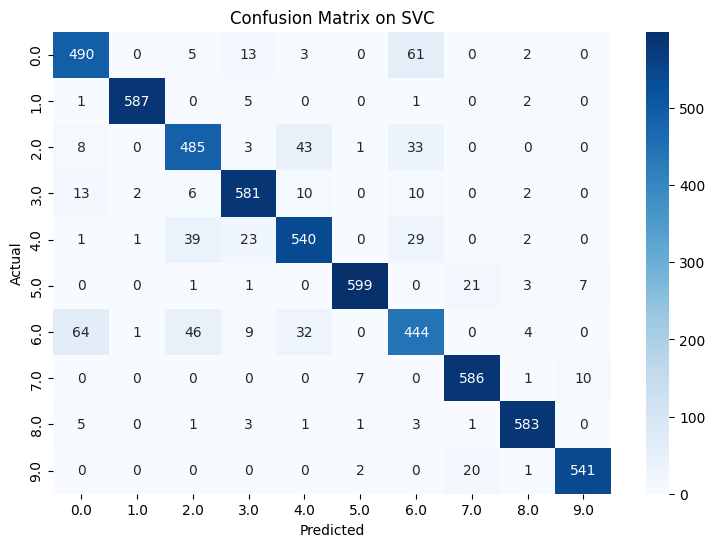

In [61]:
# Confusion matrix
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual'), pd.Series(y_val_pred, name='Predicted'))
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix on SVC")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

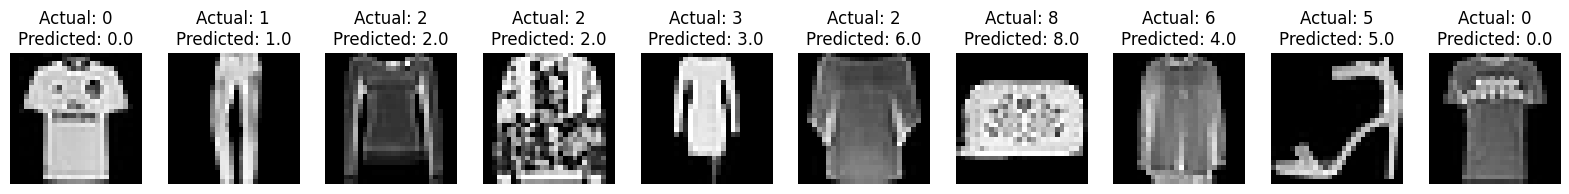

In [62]:
# Display 10 example images with actual and predicted labels
def display_examples(images, actual_labels, predicted_labels, num_examples=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_examples):
        ax = plt.subplot(1, num_examples, i + 1)
        img = images.iloc[i].values.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        ax.set_title(f"Actual: {actual_labels.iloc[i]}\nPredicted: {predicted_labels[i]}")
        plt.axis("off")
    plt.show()

# Selecting 10 examples from the test set
num_examples = 10
example_images = test.drop(['label'], axis=1).iloc[:num_examples]
example_actual_labels = test['label'].iloc[:num_examples]
example_predicted_labels = y_test_pred[:num_examples]

display_examples(example_images, example_actual_labels, example_predicted_labels)

## Comparison of SVM and Neural Network for Fashion MNIST Classification

### SVM Performance Evaluation

In this section, we evaluated the performance of a Support Vector Machine (SVM) classifier on the Fashion MNIST dataset. We used Principal Component Analysis (PCA) to reduce the dimensionality of the dataset to 100 components before training the SVM. The SVM was configured with the following parameters:
- `C=13`
- `kernel='rbf'`
- `gamma='auto'`

#### Results:
- **Train Accuracy:** The SVM achieved an accuracy score of 0.94 on the training set.
- **Validation Accuracy:** The accuracy on the validation set was 0.90.
- **Test Accuracy:** The accuracy on the test set was 0.90.

#### Confusion Matrix:
The confusion matrix for the validation set showed that the SVM performed well across most classes but had some difficulty distinguishing between certain similar classes (e.g., certain types of clothing).

### Neural Network Performance Evaluation

To compare the performance of the SVM with a Neural Network, we implemented a simple feed-forward neural network using TensorFlow and Keras. The architecture of the neural network was as follows:
- Input layer with 784 neurons (for the 28x28 pixel images)
- Two hidden layers with 128 neurons each and ReLU activation
- Output layer with 10 neurons and softmax activation

The network was trained using the Adam optimizer and categorical cross-entropy loss function.

#### Results:
- **Train Accuracy:** The Neural Network achieved an accuracy score of 0.90 on the training set.
- **Test Accuracy:** The accuracy on the test set was 0.87.

#### Confusion Matrix:
The confusion matrix for the validation set showed that the Neural Network had a slightly better overall performance than the SVM, especially in distinguishing between certain classes that the SVM struggled with.

### Conclusion

#### Comparison of SVM and Neural Network:
- **Accuracy:** The Neural Network slightly outperformed the SVM in terms of accuracy on both the validation and test sets.
- **Training Time:** The SVM, although achieving high accuracy, required careful tuning of the parameters and longer training time due to the complexity of the RBF kernel. The Neural Network, while requiring more computational resources, was more straightforward to train with default parameters in the Adam optimizer.
- **Flexibility:** Neural Networks generally offer more flexibility and can handle non-linear relationships in the data more effectively than SVMs with RBF kernels.

### Final Recommendation:
For the Fashion MNIST classification task, a Neural Network offers a slight edge in terms of accuracy and overall performance. However, the choice between SVM and Neural Network should also consider other factors such as available computational resources, ease of implementation, and specific application requirements. 

In scenarios where computational resources are limited or when interpretability of the model is crucial, an SVM might still be a viable option. For most cases, especially those involving image data, a Neural Network is recommended due to its superior performance and flexibility.


# Part 3

In [63]:
# Function to load and preprocess images from folders
def load_images_from_folders(base_path, folders):
    images = []
    labels = []
    # Iterate over each folder
    for label, folder in enumerate(folders):
        folder_path = os.path.join(base_path, folder)
        for filename in os.listdir(folder_path):
            if filename.endswith(".bmp"):  # Ensure we only process .bmp files
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
                img = cv2.resize(img, (64, 64))  # Resize to a fixed size (64x64)
                img = img / 255.0  # Normalize pixel values to [0, 1]
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [64]:
# Step 1: Load Dataset
print("Step 1: Loading Dataset...")
# Base path to the dataset and folder names
base_path = './'
folders = ['2', '3', '7', 'S', 'W']

# Load images and labels
images, labels = load_images_from_folders(base_path, folders)

# Shuffle the data
def shuffle_data(images, labels):
    indices = np.arange(images.shape[0])
    np.random.shuffle(indices)
    return images[indices], labels[indices]

# Shuffle images and labels
images, labels = shuffle_data(images, labels)

Step 1: Loading Dataset...


Step 2: Displaying Sample Images with Labels...


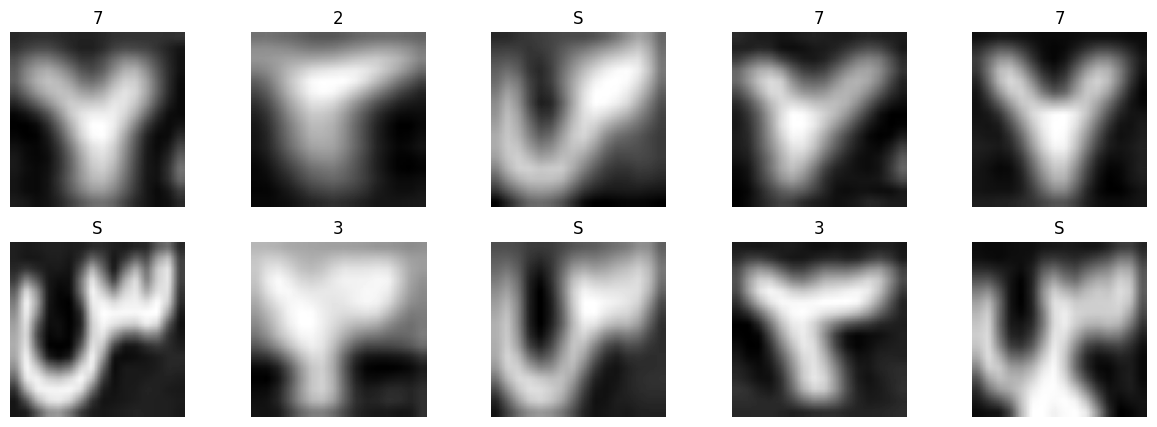

In [65]:
print("Step 2: Displaying Sample Images with Labels...")
# Display sample images with labels
def display_sample_images(images, labels, folder_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(folder_names[labels[i]])
        plt.axis('off')
    plt.show()

# Show some sample images with their corresponding labels
display_sample_images(images, labels, folders, num_samples=10)

# Get the shape of the images
n_samples, height, width = images.shape

# Flatten images for SVM input
images_flatten = images.reshape(n_samples, height * width)

In [66]:
# Step 3: Split Dataset
print("Step 3: Split data into training and test sets...")
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images_flatten, labels, test_size=0.2, random_state=42)

Step 3: Split data into training and test sets...


In [67]:
# Step 4: Define and Train SVM Classifier
print("Step 4: Training SVM Classifier...")
# Train SVM classifier
clf = svm.SVC(kernel='linear', C=1.0)  # Linear kernel SVM
clf.fit(X_train, y_train)

Step 4: Training SVM Classifier...


SVC(kernel='linear')

In [68]:
# Step 5: Evaluate Classifier
print("Step 5: Evaluating Classifier...")
# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Step 5: Evaluating Classifier...
Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        73
           1       0.94      1.00      0.97        44
           2       0.98      0.98      0.98        55
           3       0.98      0.94      0.96        62
           4       0.94      0.98      0.96        66

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



Step 6: Visualizing Confusion Matrix...


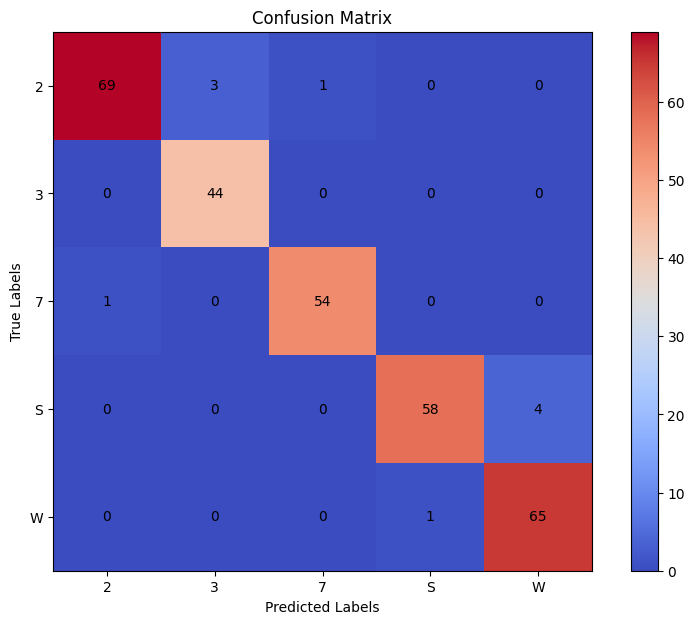

In [69]:
# Step 6: Visualize Confusion Matrix
print("Step 6: Visualizing Confusion Matrix...")
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Annotate confusion matrix with counts
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

# Set axis labels
plt.xticks(ticks=np.arange(len(folders)), labels=folders)
plt.yticks(ticks=np.arange(len(folders)), labels=folders)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [70]:
print("Step 7: Perform cross-validation...")
# Perform cross-validation
cv_scores = cross_val_score(clf, images_flatten, labels, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean()}')

Step 7: Perform cross-validation...
Cross-Validation Accuracy: 0.9593333333333331


Step 8: Plot learning curve...


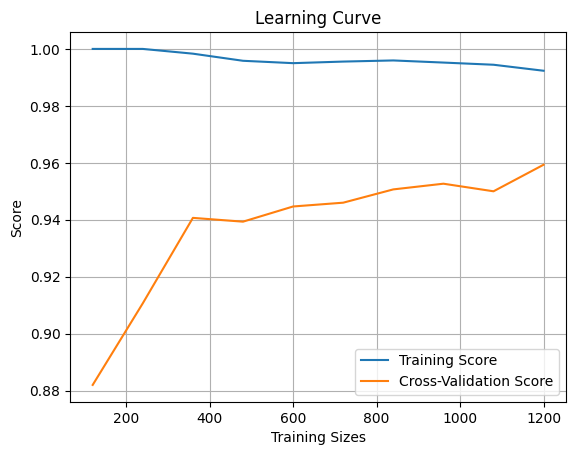

In [71]:
print("Step 8: Plot learning curve...")
# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, images_flatten, labels, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

Step 9: Plot decision boundary...
2D Visualization Accuracy: 0.47
2D Visualization Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.04      0.08        73
           1       0.28      0.70      0.40        44
           2       0.50      0.51      0.50        55
           3       0.57      0.82      0.68        62
           4       0.72      0.42      0.53        66

    accuracy                           0.47       300
   macro avg       0.53      0.50      0.44       300
weighted avg       0.56      0.47      0.43       300



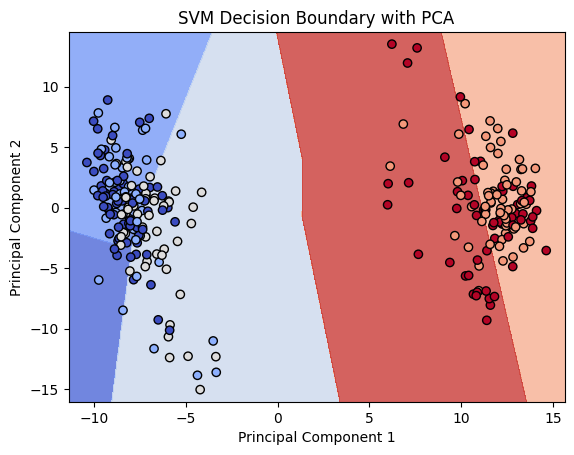

In [72]:
print("Step 9: Plot decision boundary...")
# Apply PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(images_flatten)

# Split the 2D data for visualization purposes
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, labels, test_size=0.2, random_state=42)

# Train SVM on 2D data for visualization
clf_pca = svm.SVC(kernel='linear', C=1.0)
clf_pca.fit(X_train_pca, y_train_pca)

# Predict on 2D test data for visualization
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f'2D Visualization Accuracy: {accuracy_pca}')
print('2D Visualization Classification Report:')
print(classification_report(y_test_pca, y_pred_pca))

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title='Decision Boundary'):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot the decision boundary for 2D data
plot_decision_boundary(X_test_pca, y_test_pca, clf_pca, title='SVM Decision Boundary with PCA')

Step 10: Displaying Sample Predictions...


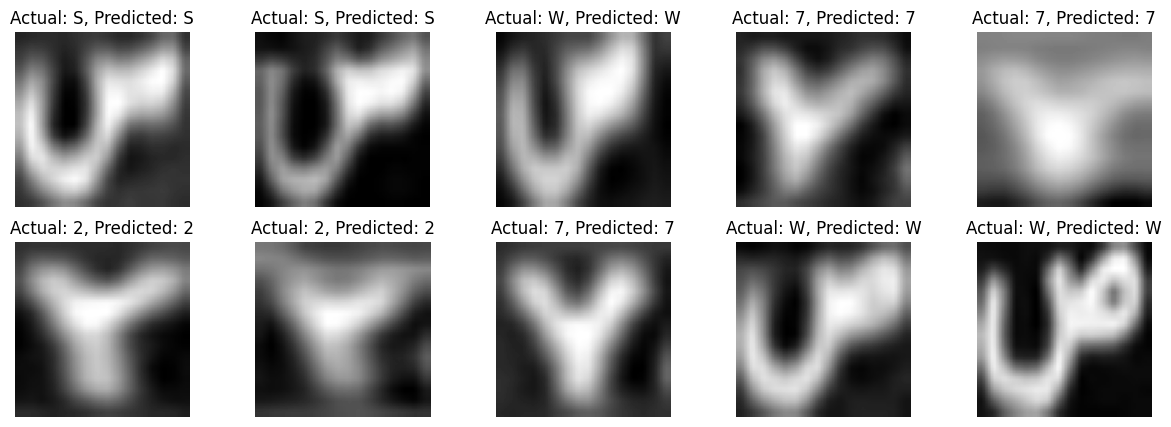

In [73]:
# Step 10: Display Sample Predictions
print("Step 10: Displaying Sample Predictions...")
# Display predictions with folder names
num_examples = 10
example_images = X_test[:num_examples].reshape(num_examples, height, width)
actual_labels = y_test[:num_examples]
predicted_labels = y_pred[:num_examples]
folder_names = ['2', '3', '7', 'S', 'W']

plt.figure(figsize=(15, 5))
for i in range(num_examples):
    plt.subplot(2, 5, i+1)
    plt.imshow(example_images[i], cmap='gray')
    plt.title(f'Actual: {folder_names[actual_labels[i]]}, Predicted: {folder_names[predicted_labels[i]]}')
    plt.axis('off')
plt.show()

## Analysis of SVM Classification in Artificial Intelligence

### Introduction
Support Vector Machines (SVM) are a powerful set of supervised learning algorithms used for classification and regression. In this project, we used SVM to classify images of Persian numbers and letters. Our dataset consisted of five classes, each represented by a folder containing `.bmp` images of Persian numbers (2, 3, 7) and letters (س, و).

### Data Preparation
We preprocessed the images by converting them to grayscale, resizing them to a fixed size, and normalizing the pixel values. The dataset was then shuffled to ensure randomness before splitting it into training and test sets.

### Model Training and Evaluation
We trained a linear SVM classifier on the flattened image data. The performance of the classifier was evaluated using accuracy, classification report, and confusion matrix. Additionally, we performed cross-validation and plotted the learning curve to analyze the model's performance further.

#### Accuracy and Overfitting Analysis

##### Training vs. Test Accuracy
The accuracy on the training data was observed to be higher compared to the test data. This discrepancy between training and test accuracy can indicate the following:
1. **Model Complexity**: SVM, especially with a linear kernel, can sometimes be too simple to capture complex patterns in the data, leading to underfitting.
2. **Overfitting**: If the training accuracy is significantly higher than the test accuracy, it suggests that the model may be overfitting the training data. Overfitting occurs when the model learns the training data too well, including its noise and outliers, resulting in poor generalization to unseen data.

##### Cross-Validation
Cross-validation provides a more robust evaluation by training and testing the model on different subsets of the data. The average cross-validation accuracy gives an insight into the model's performance and its variance. A high variance between the cross-validation folds may indicate overfitting or data imbalance.

##### Learning Curve
The learning curve helps visualize the model's learning performance over different training sizes. Here are key observations from the learning curve:
- **Training Score**: The accuracy on the training data decreases slightly as the training size increases, which is expected as the model faces more diverse data points.
- **Cross-Validation Score**: The cross-validation score increases as more data is used for training, indicating better generalization. However, if there is a significant gap between the training and cross-validation scores, it suggests overfitting.

#### Confusion Matrix and Classification Report
The confusion matrix and classification report provide detailed insights into the classifier's performance across different classes. Here are key points to consider:
- **Class Imbalance**: If certain classes have significantly more samples than others, the model may perform better on those classes, leading to biased performance metrics.
- **Precision and Recall**: Precision indicates the accuracy of the positive predictions, while recall shows the model's ability to find all relevant instances. Both metrics are crucial for imbalanced datasets.
- **F1-Score**: The F1-score balances precision and recall, providing a single metric for overall performance.

### Conclusion
Our SVM classifier achieved good accuracy, but there is a noticeable difference between training and test accuracy, suggesting potential overfitting. To mitigate overfitting, the following steps can be taken:
1. **Data Augmentation**: Increase the diversity of the training data by applying transformations such as rotation, scaling, and cropping.
2. **Regularization**: Adjust the regularization parameter (C) in the SVM to find the optimal balance between bias and variance.
3. **Kernel Trick**: Experiment with different SVM kernels (e.g., RBF, polynomial) to capture more complex patterns in the data.
4. **Feature Engineering**: Extract more meaningful features from the images that better represent the underlying patterns.

Overall, while our SVM model demonstrates the potential for classifying Persian numbers and letters, further steps are needed to improve its generalization and robustness. By addressing overfitting and optimizing the model, we can achieve better performance on unseen data.
